# LDA 토픽 모델링 분석을 통한 챗GPT 활용에 대한 탐색적 연구 -챗GPT와 교육을 중심으로-
https://www.dbpia.co.kr/journal/articleDetail?nodeId=*NODE11954394*

In [2]:
!pip install pandas numpy nltk gensim pyLDAvis scikit-learn matplotlib wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.6 MB/s eta 0:00:00


In [11]:
# Replace the import statement
import pyLDAvis
import pyLDAvis.lda_model
# Replace pyLDAvis.sklearn.prepare with pyLDAvis.lda_model.prepare
# Use 'pcoa' instead of 'tsne' for MDS
vis = pyLDAvis.lda_model.prepare(lda, X, vectorizer, mds='pcoa') # Updated visualization function call

# Display the visualization
pyLDAvis.display(vis) # Assuming you want to display the visualization in a notebook environment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic #1:
inflation economy global stock rates market impact continue rise tech
Topic #2:
rates market impact continue global inflation economy stock rise tech
Topic #3:
tech market continue impact stock rates global inflation economy rise
Topic #4:
rates market impact continue global inflation economy stock rise tech
Topic #5:
continue market rise inflation economy impact global rates stock tech


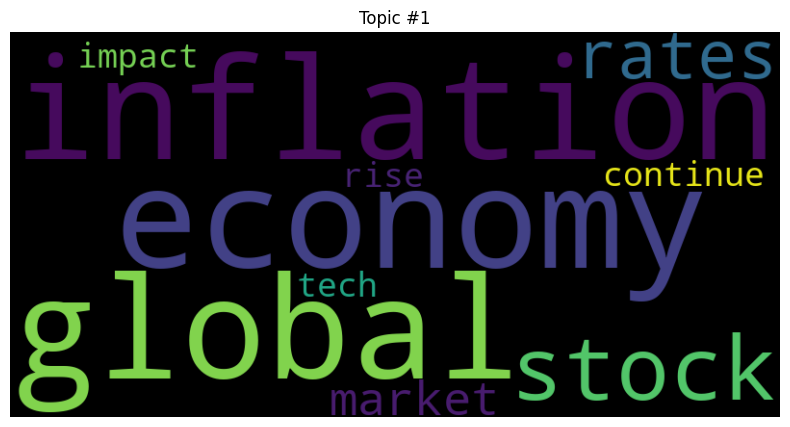

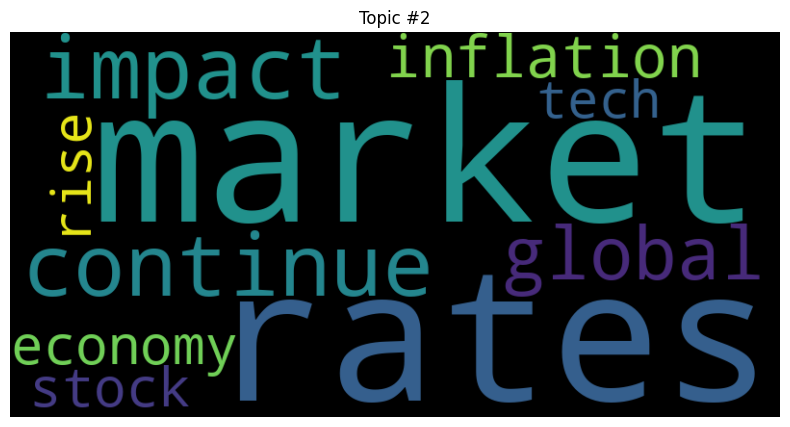

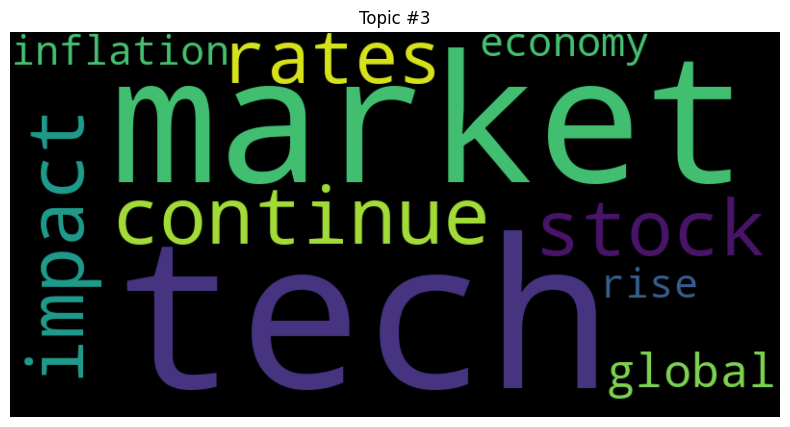

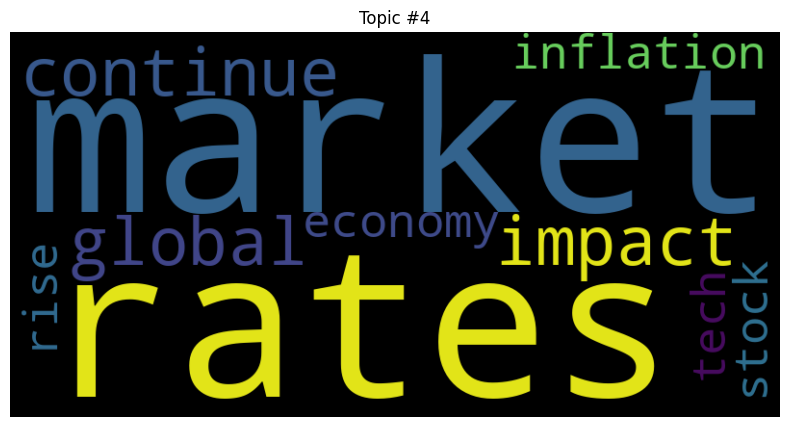

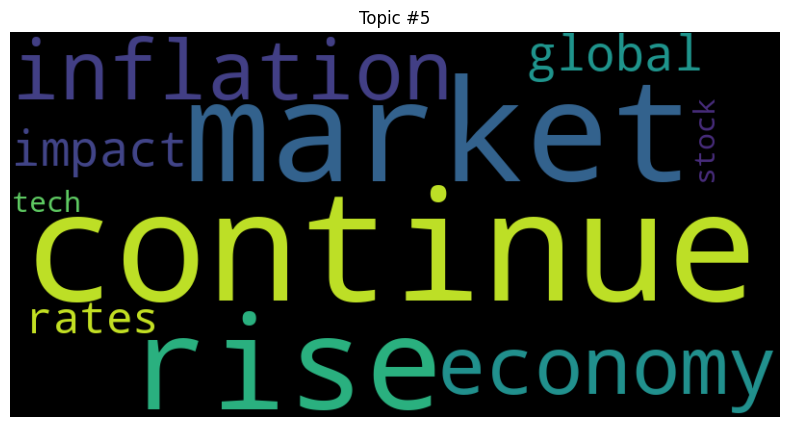

ModuleNotFoundError: No module named 'pyLDAvis.sklearn'

In [12]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation

# Ensure nltk stopwords are downloaded
nltk.download('stopwords')

# Sample financial news data
data = pd.read_csv('/content/financial_news_sample.csv')  # Make sure you have a financial dataset

# Preprocessing the text data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters and numbers
    text = ''.join([char if char.isalpha() else ' ' for char in text])
    # Tokenize and remove stopwords
    stop_words = stopwords.words('english')
    tokens = [word for word in text.split() if word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing to each article
data['processed_text'] = data['article_text'].apply(preprocess_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(data['processed_text'])

# LDA Topic Modeling using sklearn
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Print the top words for each topic
def print_top_words(model, feature_names, n_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]))

# Get feature names
feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, feature_names)

# Visualization: WordCloud for top words in each topic
def plot_word_cloud(model, feature_names, n_words=20):
    for topic_idx, topic in enumerate(model.components_):
        word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_words - 1:-1]}
        wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Topic #{topic_idx + 1}")
        plt.axis('off')
        plt.show()

# Visualize WordCloud for topics
plot_word_cloud(lda, feature_names)

# LDA Model Visualization with pyLDAvis
import pyLDAvis.sklearn

# Visualize the topics
vis = pyLDAvis.sklearn.prepare(lda, X, vectorizer, mds='tsne')
pyLDAvis.show(vis)


In [15]:
                                         article_text
0  Stock markets have experienced significant flu...
1  In an unprecedented move, the European Central ...
2  Cryptocurrency investments continue to surge as...
3  Global oil prices have been on the rise due to p...
4  The latest earnings reports from top tech compan...
5  The real estate market has seen a decline in sal...
6  Economists are divided over the potential for a ...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: invalid syntax (<ipython-input-15-a581580fa2f2>, line 2)

In [13]:
# prompt: can i get total wordcrowd?

import pandas as pd
from collections import Counter

# Assuming your data is in a pandas DataFrame called 'data'
# and the text data is in the 'article_text' column

# Combine all article texts into a single string
all_text = ' '.join(data['article_text'])

# Convert the text to lowercase (optional but recommended)
all_text = all_text.lower()

# Remove punctuation and special characters (you can customize this)
import re
all_text = re.sub(r'[^\w\s]', '', all_text)


# Tokenize the text into words
words = all_text.split()

# Count word frequencies
word_counts = Counter(words)

# Print the total word count
print("Total number of words:", sum(word_counts.values()))

# Print the top N most frequent words (optional)
n = 10  # Change this to the desired number of top words
print("\nTop", n, "most frequent words:")
for word, count in word_counts.most_common(n):
    print(f"{word}: {count}")

Total number of words: 204

Top 10 most frequent words:
the: 16
in: 9
to: 7
market: 6
a: 5
continue: 4
are: 4
have: 3
interest: 3
rates: 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


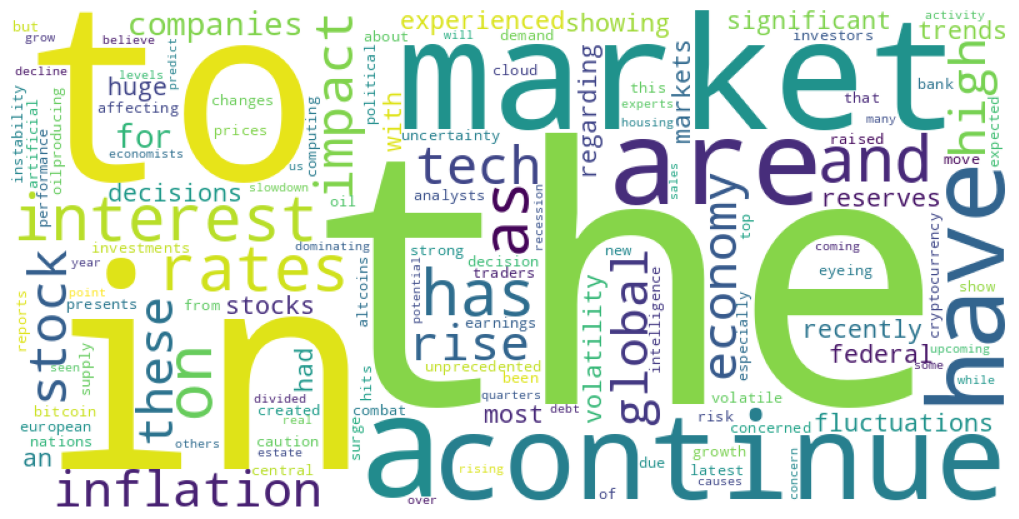

In [14]:
# prompt: can you visualize total word crowd

# Generate the word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()